In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'I:/数据分析/Task 10/CDNOW.txt'
file_data =pd.read_csv(path,sep = '\s+', names=['ID','date','number','pay'])

In [2]:
# number and pay
# 数量及金额分析
file_data.describe()

,ID,date,number,pay
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [9]:
file_data.head()

,ID,date,number,pay
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [38]:
#订单数量分析
np.unique(file_data['ID'])
file_data.ID == 1

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
69629    False
69630    False
69631    False
69632    False
69633    False
69634    False
69635    False
69636    False
69637    False
69638    False
69639    False
69640    False
69641    False
69642    False
69643    False
69644    False
69645    False
69646    False
69647    False
69648    False
69649    False
69650    False
69651    False
69652    False
69653    False
69654    False
69655    False
69656    False
69657    False
69658    False
Name: ID, Length: 69659, dtype: bool

In [66]:
temp_number = [file_data[(file_data.ID == temp)].number.sum() for temp in np.unique(file_data.ID)]


In [67]:
ID_number = pd.DataFrame(np.vstack([np.unique(file_data.ID),temp_number]),index=['ID','sum_number'])

In [68]:
ID_number

,0,1,2,3,4,5,6,7,8,9,...,23560,23561,23562,23563,23564,23565,23566,23567,23568,23569
ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
sum_number,1,6,16,7,29,1,18,18,6,3,...,6,2,3,5,1,2,1,6,2,5


In [70]:
temp_pay = [file_data[(file_data.ID == temp)].pay.sum() for temp in np.unique(file_data.ID)]
ID_pay = pd.DataFrame(np.vstack([np.unique(file_data.ID),temp_pay]),index=['ID','sum_pay'])
ID_pay

,0,1,2,3,4,5,6,7,8,9,...,23560,23561,23562,23563,23564,23565,23566,23567,23568,23569
ID,1.00,2.0,3.00,4.0,5.00,6.00,7.00,8.00,9.00,10.00,...,23561.00,23562.00,23563.00,23564.00,23565.00,23566.0,23567.00,23568.0,23569.00,23570.00
sum_pay,11.77,89.0,156.46,100.5,385.61,20.99,264.67,197.66,95.85,39.31,...,83.46,29.33,58.75,70.01,11.77,36.0,20.97,121.7,25.74,94.08


In [73]:
file_data.date = pd.to_datetime(file_data.date,format='%Y%m%d')

In [75]:
file_data.set_index('date',drop=True,inplace=True)
file_data.head()

,ID,number,pay
date,,,
1997-01-01,1,1,11.77
1997-01-12,2,1,12.00
1997-01-12,2,5,77.00
1997-01-02,3,2,20.76
1997-03-30,3,2,20.76


In [81]:
grouped = file_data.groupby(level=0)
data1 = grouped.sum()
data1

,ID,number,pay
date,,,
1997-01-01,26084,494,7515.35
1997-01-02,91156,530,8025.95
1997-01-03,146344,495,7475.04
1997-01-04,150310,404,6722.93
1997-01-05,276888,590,9274.80
1997-01-06,359135,620,9680.55
1997-01-07,343701,494,7741.19
1997-01-08,421389,515,7963.14
1997-01-09,481231,482,7534.92


In [79]:
import matplotlib.pyplot as plt

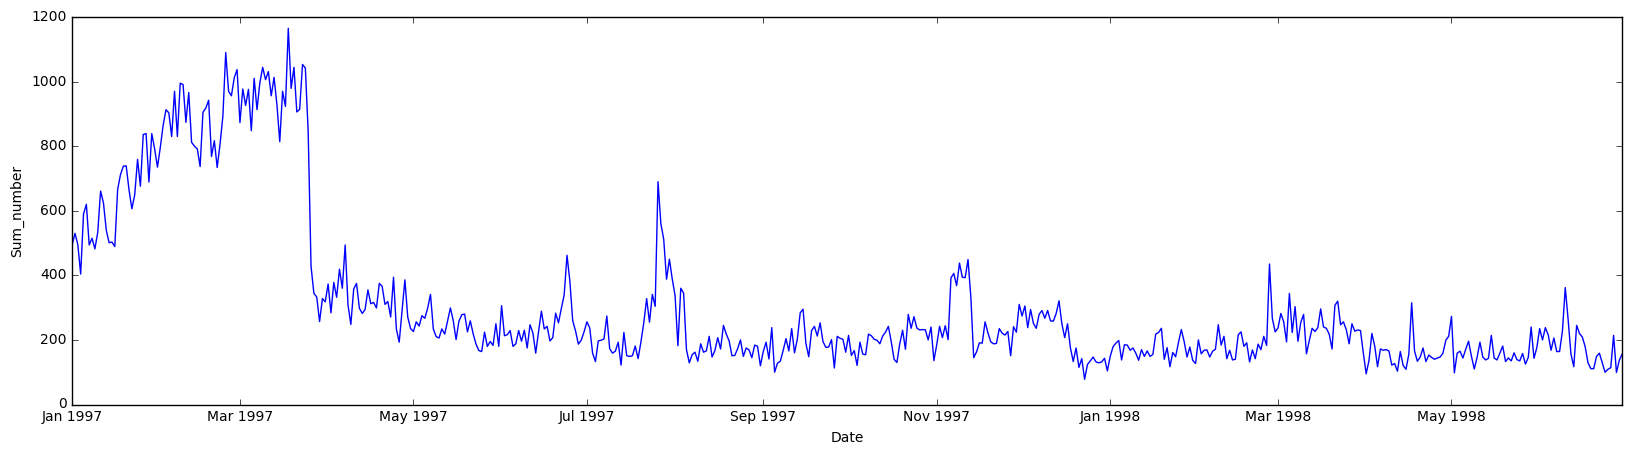

In [95]:
# 订单数量趋势分析
fig,ax1 = plt.subplots(figsize=(20,5))
ax1.plot(data1.number,label='sum_number')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sum_number')
plt.show()

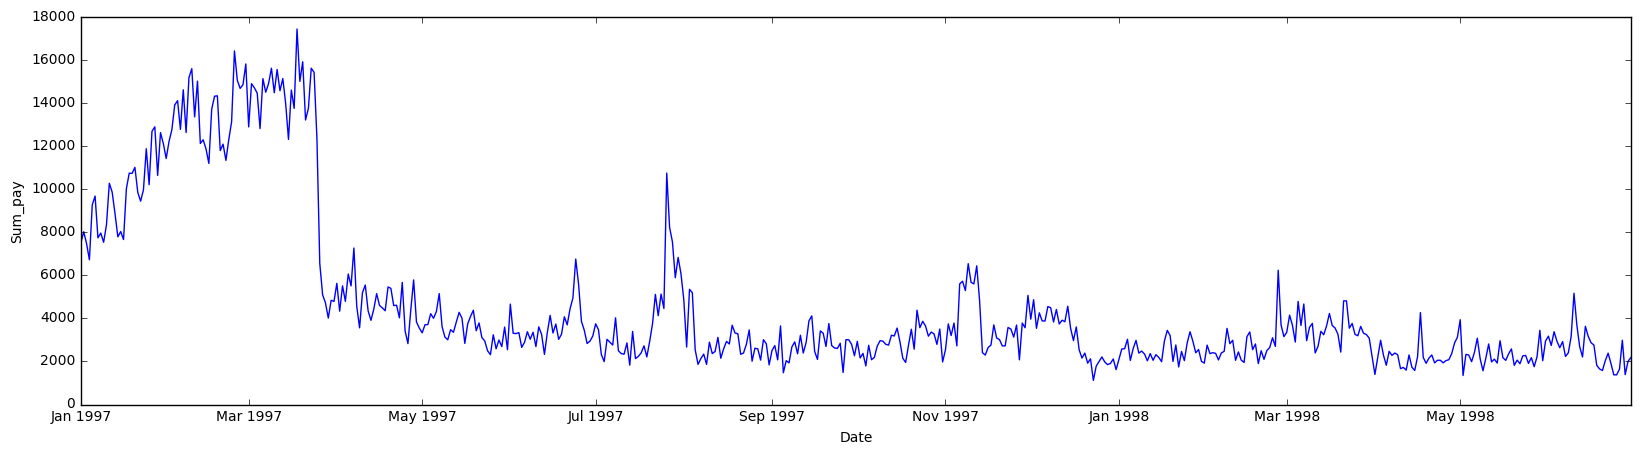

In [94]:
# 订单金额趋势分析
fig,ax1 = plt.subplots(figsize=(20,5))
ax1.plot(data1.pay,label='sum_pay')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sum_pay')
plt.show()

In [98]:
# 异常值检测
file_data.isnull().any() # 检测是否有缺失的数据

ID        False
number    False
pay       False
dtype: bool

In [101]:
file_data[(file_data.number == 0)]  # 检测数据是否有购买数量为0，但价格却不为0的

,ID,number,pay
date,,,


In [102]:
file_data[(file_data.pay == 0)]  # 检测用户买了商品，但是缺少价格数据的

,ID,number,pay
date,,,
1997-01-02,455,1,0.0
1997-01-03,713,1,0.0
1997-01-04,908,1,0.0
1997-01-04,925,1,0.0
1997-01-05,1101,1,0.0
1997-01-05,1186,1,0.0
1997-01-05,1225,1,0.0
1997-01-06,1381,1,0.0
1997-01-06,1401,1,0.0


In [103]:
# 各用户累计购买数量
file_data.groupby('ID').sum()

,number,pay
ID,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61
6,1,20.99
7,18,264.67
8,18,197.66
9,6,95.85


In [104]:
file_data.groupby('ID').sum().describe()

,number,pay
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [108]:
temp_number = file_data.groupby('ID').sum().number
temp_number

ID
1         1
2         6
3        16
4         7
5        29
6         1
7        18
8        18
9         6
10        3
11        4
12        4
13        4
14        2
15        4
16        8
17        5
18        1
19       11
20       46
21        4
22        1
23        2
24        4
25       12
26        6
27       10
28        7
29       28
30        2
         ..
23541     2
23542     5
23543     2
23544    12
23545     1
23546     1
23547     2
23548     2
23549     2
23550     2
23551    12
23552     4
23553     8
23554     3
23555    14
23556    15
23557     1
23558    11
23559     8
23560     1
23561     6
23562     2
23563     3
23564     5
23565     1
23566     2
23567     1
23568     6
23569     2
23570     5
Name: number, Length: 23570, dtype: int64

In [117]:
# 购买数量贡献分析
temp_total_number = file_data.groupby('ID').sum().describe().number['count']
temp_total_number
temp_rate = (temp_number/temp_total_number).sort_values(ascending=False)
temp_rate

ID
14048    0.043827
7592     0.038905
7983     0.022741
7931     0.021807
19339    0.016037
22279    0.014001
499      0.013916
6569     0.013661
3049     0.012770
16517    0.012686
13167    0.012389
22061    0.011328
12367    0.011158
2664     0.010649
20917    0.009419
21950    0.008655
22348    0.008273
2908     0.007976
586      0.007934
21739    0.007764
16175    0.007722
15162    0.007722
313      0.007382
19597    0.007382
3901     0.007382
22492    0.007170
17337    0.006958
21694    0.006916
8250     0.006831
1077     0.006746
           ...   
8194     0.000042
19065    0.000042
8188     0.000042
8185     0.000042
8202     0.000042
8182     0.000042
19072    0.000042
8179     0.000042
8178     0.000042
8176     0.000042
19074    0.000042
8201     0.000042
19062    0.000042
8245     0.000042
19042    0.000042
8243     0.000042
19031    0.000042
8235     0.000042
8231     0.000042
8229     0.000042
19039    0.000042
8225     0.000042
19061    0.000042
19045    0.000042
8217   

In [121]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(temp_rate.values)


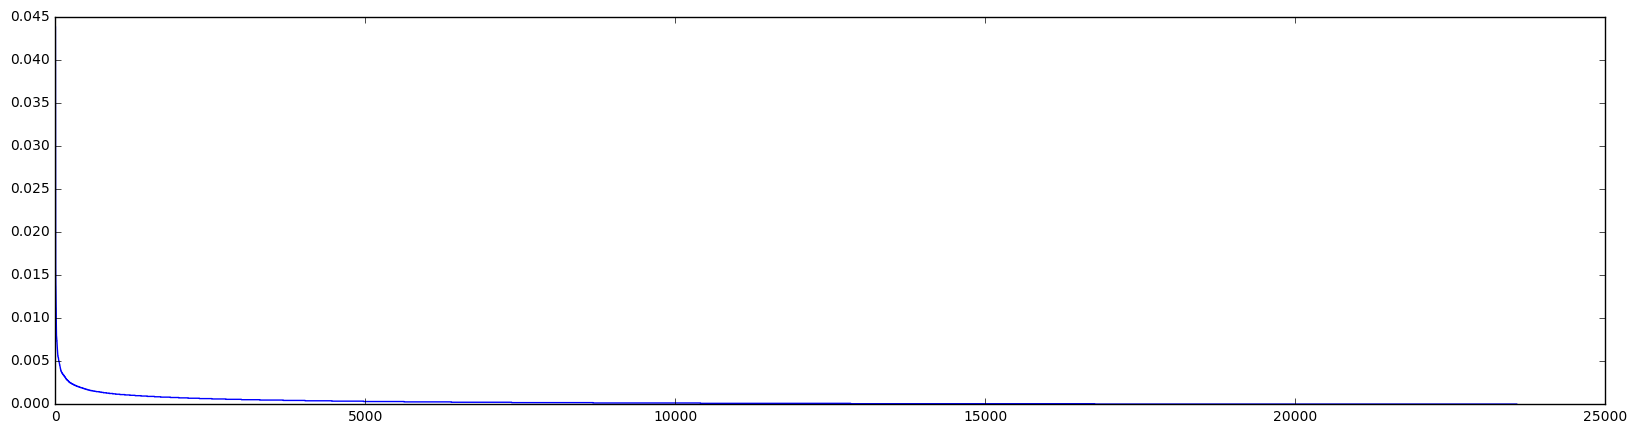

In [122]:
plt.show()

In [124]:
file_data.groupby('ID').number.max().sort_values(ascending=False)

ID
8830     99
23474    70
22279    63
8529     56
7592     47
10550    43
14894    42
1412     41
15003    40
15238    39
3537     39
4766     38
8187     38
9651     37
10197    37
18769    37
18847    32
17337    32
4410     32
2275     30
4388     30
313      30
9210     29
16175    29
9172     28
2930     27
9362     27
9644     27
1909     27
20       27
         ..
6782      1
6781      1
19835     1
6779      1
16987     1
19836     1
12362     1
6775      1
6774      1
6773      1
19829     1
6794      1
17000     1
6797      1
6815      1
19812     1
12341     1
12342     1
19814     1
16997     1
12345     1
6807      1
16996     1
16995     1
6802      1
6801      1
12350     1
12351     1
19825     1
1         1
Name: number, Length: 23570, dtype: int64

In [127]:
file_data.groupby('ID').sum().describe()

,number,pay
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


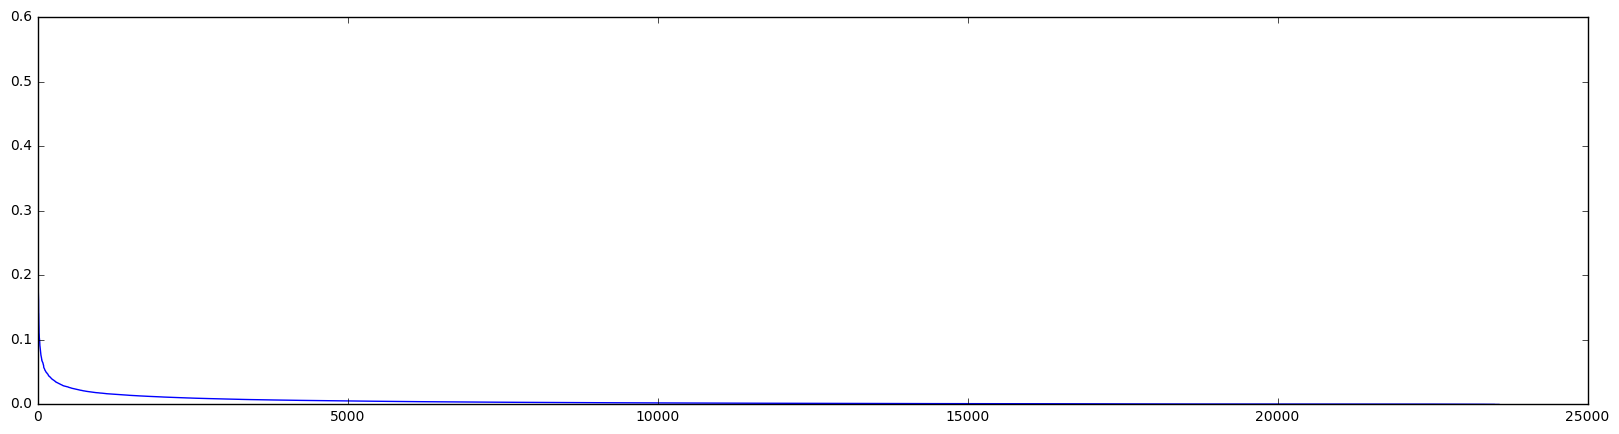

In [134]:
temp_pay = file_data.groupby('ID').sum().pay
temp_total_pay = file_data.groupby('ID').sum().describe().pay['count']
temp_rate = ((temp_pay/temp_total_pay).sort_values(ascending=False))

fig,ax = plt.subplots(figsize=(20,5))
ax.plot(temp_rate.values)
plt.show()

In [135]:
file_data.groupby('ID').pay.max().sort_values(ascending=False)

ID
8830     1286.01
18847    1119.68
14894    1028.51
23474     932.23
22279     915.10
8529      756.47
10550     669.93
12304     606.55
3537      597.61
10197     587.63
1903      575.92
7592      563.59
1412      558.09
15238     544.83
15003     506.97
9355      498.48
18769     497.29
17337     495.39
9651      493.91
15162     463.93
8250      460.85
313       457.49
10603     440.45
9362      436.91
6950      432.76
22815     428.30
15953     421.73
4410      421.30
21396     410.54
9172      409.22
          ...   
455         0.00
16132       0.00
13434       0.00
1225        0.00
19314       0.00
22950       0.00
2129        0.00
1381        0.00
15258       0.00
1186        0.00
22173       0.00
15452       0.00
19189       0.00
11270       0.00
11940       0.00
11955       0.00
925         0.00
13408       0.00
908         0.00
16921       0.00
5196        0.00
19384       0.00
10798       0.00
3134        0.00
20252       0.00
5301        0.00
21391       0.00
10664      

In [136]:
file_data = pd.read_table(path,sep='\s+',names=['ID','date','number','pay'])
file_data.head()

,ID,date,number,pay
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [137]:
file_data.set_index('date',drop=True,inplace=True)
file_data.head()

,ID,number,pay
date,,,
19970101,1,1,11.77
19970112,2,1,12.00
19970112,2,5,77.00
19970102,3,2,20.76
19970330,3,2,20.76


In [139]:
file_data.reset_index(drop=False, inplace=True)
file_data.head()

,index,date,ID,number,pay
0,0,19970101,1,1,11.77
1,1,19970112,2,1,12.00
2,2,19970112,2,5,77.00
3,3,19970102,3,2,20.76
4,4,19970330,3,2,20.76


In [140]:
# 第一次购买时间分析
file_data[['ID','date']].groupby('ID').min().head()

,date
ID,
1,19970101
2,19970112
3,19970102
4,19970101
5,19970101


In [141]:
# 最后一次购买时间分析
file_data[['ID','date']].groupby('ID').max().head()

,date
ID,
1,19970101
2,19970112
3,19980528
4,19971212
5,19980103


In [12]:
# 最近一次消费和当前时间间隔
file_data.date = pd.to_datetime(file_data.date,format='%Y%m%d')
file_data.head()
# print((pd.to_datetime('today') - file_data[['ID','date']].groupby('ID').min()).head())
(pd.to_datetime('today') - file_data[['ID','date']].groupby('ID').min()).head() ###?????


,date
ID,
1,1992-07-19 17:01:11.928400
2,1992-07-08 17:01:11.928400
3,1992-07-18 17:01:11.928400
4,1992-07-19 17:01:11.928400
5,1992-07-19 17:01:11.928400


In [155]:
# 生命周期
file_data[['ID','date']].groupby('ID').apply(lambda x: x.max()-x.min()).head()

,ID,date
ID,,
1,0,0 days
2,0,0 days
3,0,511 days
4,0,345 days
5,0,367 days


In [158]:
# 回购周期
def returnPeriod(x):
    if len(x.date)>1:
        return x.date.iloc[1] - x.date.iloc[0]
    else:
        return None
file_data[['ID','date']].groupby('ID').apply(returnPeriod).head()

ID
1       NaT
2    0 days
3   87 days
4   17 days
5   13 days
dtype: timedelta64[ns]

In [160]:
# 平均购买周期
def averagePeriod(x):
    if len(x)>1:
        return (x.iloc[-1] - x.iloc[0])/(len(x)-1)
    else:
        return None
    
file_data[['ID','date']].groupby('ID').apply(averagePeriod).head()

,ID,date
ID,,
1,NaN,NaT
2,0.0,0 days 00:00:00
3,0.0,102 days 04:48:00
4,0.0,115 days 00:00:00
5,0.0,36 days 16:48:00


In [161]:
file_data.head()

,index,date,ID,number,pay
0,0,1997-01-01,1,1,11.77
1,1,1997-01-12,2,1,12.00
2,2,1997-01-12,2,5,77.00
3,3,1997-01-02,3,2,20.76
4,4,1997-03-30,3,2,20.76


In [162]:
file_data = pd.read_table(path,sep='\s+',names=['ID','date','number','pay'])


In [163]:
file_data.head()

,ID,date,number,pay
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [165]:
file_data.date = pd.to_datetime(file_data.date,format='%Y%m%d')

In [166]:
file_data['period']=(file_data.date - file_data.date.max())/np.timedelta64(1,'D')#计算时间差，并转换为float类型

In [167]:
file_data.head()

,ID,date,number,pay,period
0,1,1997-01-01,1,11.77,-545.0
1,2,1997-01-12,1,12.00,-534.0
2,2,1997-01-12,5,77.00,-534.0
3,3,1997-01-02,2,20.76,-544.0
4,3,1997-03-30,2,20.76,-457.0


In [170]:
user_rfm = file_data.pivot_table(values=['period','number','pay'],
                          index='ID',aggfunc={'period':'max',
                                             'number':'count',
                                                    'pay':'sum' })
print(user_rfm.head())
user_rfm = user_rfm.rename(columns = {'pay':'M','number':'F','period':'R'})

    number     pay  period
ID                        
1        1   11.77  -545.0
2        2   89.00  -534.0
3        6  156.46   -33.0
4        4  100.50  -200.0
5       11  385.61  -178.0


In [169]:
user_rfm.head()

,F,M,R
ID,,,
1,1,11.77,-545.0
2,2,89.00,-534.0
3,6,156.46,-33.0
4,4,100.50,-200.0
5,11,385.61,-178.0


In [171]:
# 用户分层
def level_label(data):
    level = data.apply(lambda x:'1' if x>= 0 else '0')
    label = level['R']+level['F']+level['M']
    d = {
        '111':"高价值客户",
        '011':"重点保持客户",
        '101':"重点发展客户",
        '001':"重点挽留客户",
        '110':"一般价值客户",
        '010':"一般保持客户",
        '100':"一般发展客户",
        '000':"潜在客户"
    }
    result = d[label]
    return result
user_rfm['label'] = (user_rfm - user_rfm.mean()).apply(level_label,axis=1)
user_rfm.head()

,F,M,R,label
ID,,,,
1,1,11.77,-545.0,潜在客户
2,2,89.00,-534.0,潜在客户
3,6,156.46,-33.0,高价值客户
4,4,100.50,-200.0,一般价值客户
5,11,385.61,-178.0,高价值客户


In [8]:
# a = file_data[['date','number']].groupby('date').count()
# a.resample('M').count().head()
# a.index().
pivoted_count = file_data.pivot_table(index = 'ID',
                                      columns='Month',
                                      values = 'number',
                                      aggfunc={'number':'count'})
# pivoted_count = pivoted_count.fillna(0)
# pivoted_count.head()
# # pivoted_count = 

KeyError: 'Month'

In [176]:
df_purchase = pivoted_count.applymap(lambda x:1 if x>1 else np.nan if x==0 else 0)

In [177]:
df_purchase.head()

date,1997-01-01 00:00:00,1997-01-02 00:00:00,1997-01-03 00:00:00,1997-01-04 00:00:00,1997-01-05 00:00:00,1997-01-06 00:00:00,1997-01-07 00:00:00,1997-01-08 00:00:00,1997-01-09 00:00:00,1997-01-10 00:00:00,...,1998-06-21 00:00:00,1998-06-22 00:00:00,1998-06-23 00:00:00,1998-06-24 00:00:00,1998-06-25 00:00:00,1998-06-26 00:00:00,1998-06-27 00:00:00,1998-06-28 00:00:00,1998-06-29 00:00:00,1998-06-30 00:00:00
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_purchase.apply(lambda x:x.sum()/x.count())

date
1997-01-01    0.014354
1997-01-02    0.004098
1997-01-03    0.008547
1997-01-04    0.005650
1997-01-05    0.007874
1997-01-06    0.007326
1997-01-07    0.013636
1997-01-08    0.021368
1997-01-09    0.008368
1997-01-10    0.017021
1997-01-11    0.010067
1997-01-12    0.007168
1997-01-13    0.020243
1997-01-14    0.020000
1997-01-15    0.008130
1997-01-16    0.020161
1997-01-17    0.014235
1997-01-18    0.015723
1997-01-19    0.017647
1997-01-20    0.033233
1997-01-21    0.034722
1997-01-22    0.018450
1997-01-23    0.020478
1997-01-24    0.022409
1997-01-25    0.032895
1997-01-26    0.017291
1997-01-27    0.019231
1997-01-28    0.009146
1997-01-29    0.015789
1997-01-30    0.019608
                ...   
1998-06-01    0.012658
1998-06-02    0.031250
1998-06-03    0.010417
1998-06-04    0.077922
1998-06-05    0.101449
1998-06-06    0.055556
1998-06-07    0.032787
1998-06-08    0.014085
1998-06-09    0.058824
1998-06-10    0.060000
1998-06-11    0.010204
1998-06-12    0.014493
1998-0